# Predict Gender from Brazilian First Names

This notebook presents descriptive evidence on gender differences on Brazilian first names that might be useful to exploit in a supervised model.

In [1]:
# Libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plot size
plt.rcParams["figure.figsize"] = [10, 5]

# Read, filter, and prepare data
nomes = pd.read_csv("../raw_data/nomes.csv")
nomes = nomes.query("prop_female > 0.8 | prop_female < 0.2")
nomes["gender"] = np.where(nomes.prop_female > 0.8, "Female", "Male")
nomes["first_name"] = nomes.first_name.str.lower().str.strip()

## Commons first and last letters in Brazilian first names

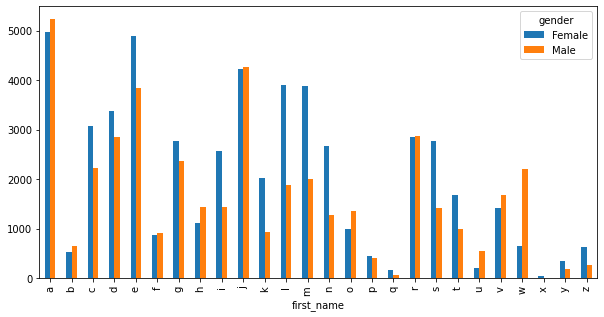

In [2]:
# Function to plot letters and ngrams by gender
def plot_gender(df, ini, last):
    pd.concat([df.first_name.str[ini:last], df.gender], axis=1)\
    .groupby(["gender", "first_name"])\
        .size()\
            .unstack("gender")\
                .plot.bar()

# Most common first vowels in first names
plot_gender(nomes, 0, 1)

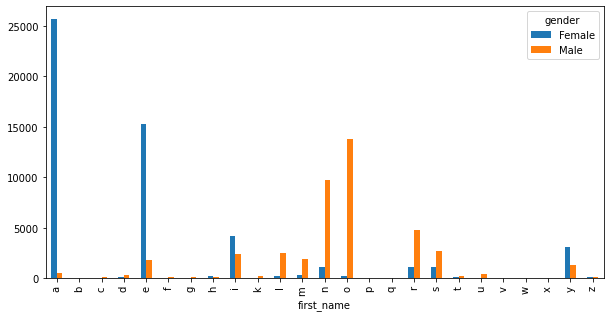

In [3]:
# Most common last vowels in first names
plot_gender(nomes, -1, None)

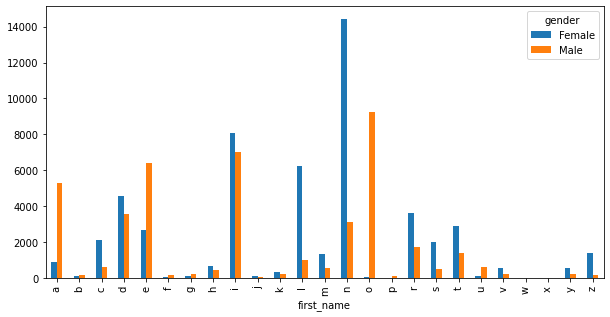

In [4]:
# Last but one
plot_gender(nomes, -2, -1)

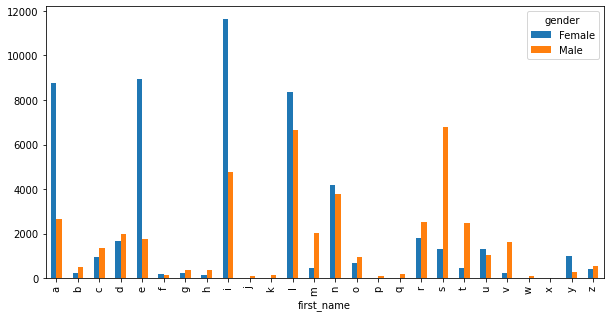

In [5]:
# Last but two
plot_gender(nomes, -3, -2)

## Commons 2-grams

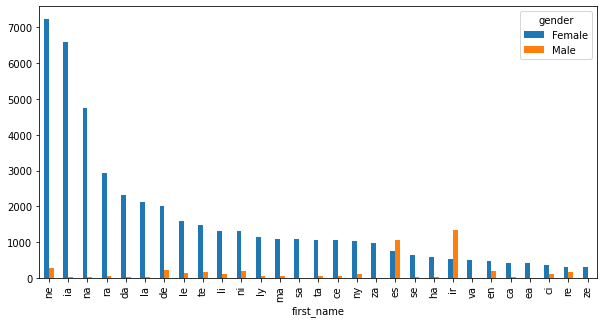

In [6]:
# Function to plot top X ngrams by gender
def plot_ngram(df, ini, last, gender, top):
    pd.concat([df.first_name.str[ini:last], df.gender], axis=1)\
    .groupby(["gender", "first_name"])\
        .size()\
            .unstack("gender")\
                .sort_values(by = [gender], ascending=False).iloc[:top]\
                    .plot.bar()

# Top 30 female last 2-gram
plot_ngram(nomes, -2, None, "Female", 29)



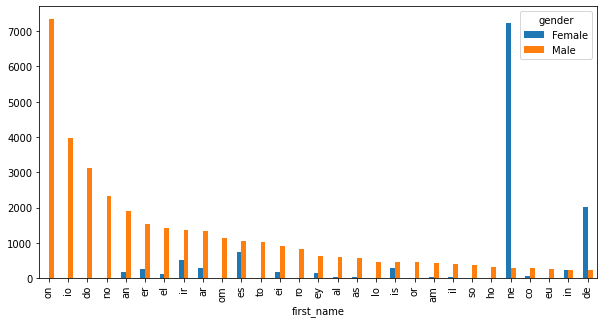

In [7]:
# Top 30 male last 2-gram
plot_ngram(nomes, -2, None, "Male", 29)